<a href="https://colab.research.google.com/github/TheAgaveFairy/MusicGeneration/blob/main/GAMEEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# exploring EEG data from GAMEEMO
# nothing super useful in this notebook, just some FFTs - see last cell

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sigfest/database-for-emotion-recognition-system-gameemo")
print("Path to dataset files:", path)

/home/paul-dutton/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████████████████████████████████| 1.70G/1.70G [02:57<00:00, 10.3MB/s]

Extracting files...


Path to dataset files: /home/paul-dutton/.cache/kagglehub/datasets/sigfest/database-for-emotion-recognition-system-gameemo/versions/1


In [3]:
# '/home/paul-dutton/.cache/kagglehub/datasets/sigfest/database-for-emotion-recognition-system-gameemo/versions/1'
path

'/home/paul-dutton/.cache/kagglehub/datasets/sigfest/database-for-emotion-recognition-system-gameemo/versions/1'

In [4]:
def list_files(startpath, trunc=True):
    print(f"root path is:\n{path}\nbeginning walk:")
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        if trunc:
            files = files[:2]
        for f in files:
            print('{}{}'.format(subindent, f))
if False:
  list_files(path)

In [5]:
random_subject_id = random.randint(1,28)
#print(f"random subject id: {random_subject_id}")
path_to_subject = os.path.join(path, f"GAMEEMO/(S{random_subject_id:02})/Raw EEG Data/.csv format/")
print(f"path to subject: {path_to_subject}")

path to subject: /home/paul-dutton/.cache/kagglehub/datasets/sigfest/database-for-emotion-recognition-system-gameemo/versions/1/GAMEEMO/(S06)/Raw EEG Data/.csv format/


In [33]:
LENGTH_OF_SAMPLE_IN_SECONDS = 300
GAME_NAMES = ['Train Sim World (Boring)', 'Unravel (Calm)', 'Slender - The Arrival (Horror)', 'Goat Simulator (Funny)']
COLORS = ['k', 'c', 'r', 'y']

def plotFFTs(df: pd.DataFrame, csv_filename: str):
    wanted_cols = [col for col in df.columns if 'Unnamed' not in col]
    my_idx = (int(csv_filename[4]) - 1)
    current_game = GAME_NAMES[my_idx]
    my_color = COLORS[my_idx]

    NUM_ROWS = len(df)
    SAMPLE_RATE = NUM_ROWS / LENGTH_OF_SAMPLE_IN_SECONDS

    fig, axes = plt.subplots(len(wanted_cols)//2, 2, figsize=(12, len(wanted_cols) * 2))
    
    for i, col in enumerate(wanted_cols):
      eeg_array = df[col]
      eeg_fft = np.fft.rfft(eeg_array)
      frequencies = np.fft.fftfreq(eeg_fft.size, d = 1.0/SAMPLE_RATE)
      axes[i//2,i%2].plot(frequencies, eeg_fft, my_color)
      my_title = f'S{random_subject_id:02}: {current_game} {col}'
      axes[i//2,i%2].set_title(my_title)
      axes[i//2,i%2].set_xlabel('Frequency')
      axes[i//2,i%2].set_ylabel('Amplitude')
      axes[i//2,i%2].grid(True)
      axes[i//2,i%2].set_xlim(0, 30)#SAMPLE_RATE / 2)
    fig.tight_layout()
    image_out_path = os.path.join('gameemo-images', my_title)
    plt.savefig(image_out_path + '.png')
    plt.show()


/home/paul-dutton/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/paul-dutton/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


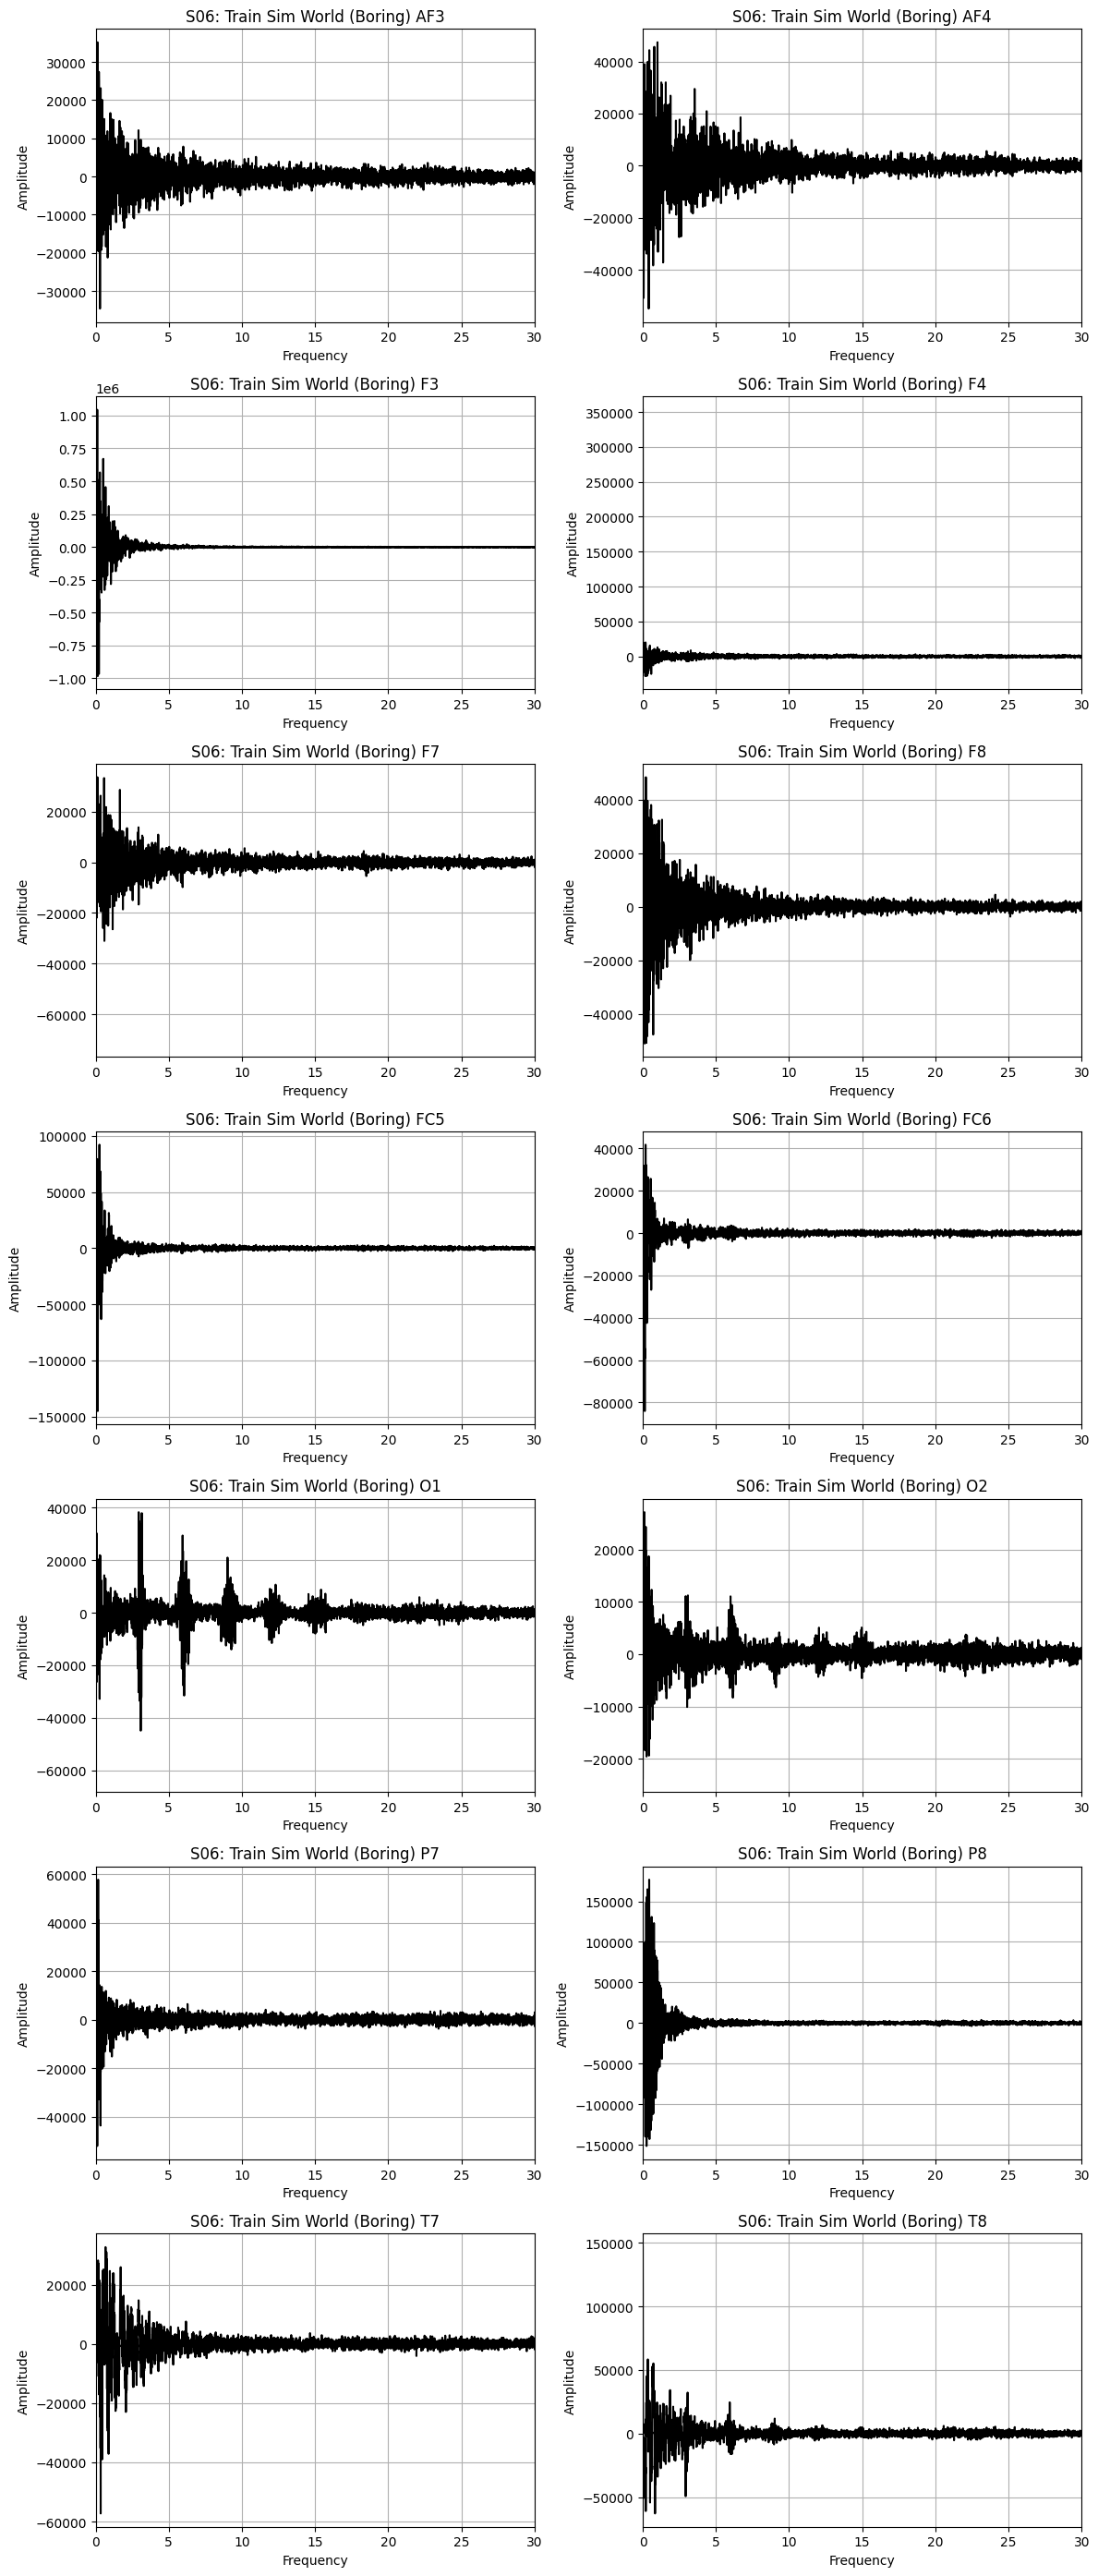

/home/paul-dutton/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/paul-dutton/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


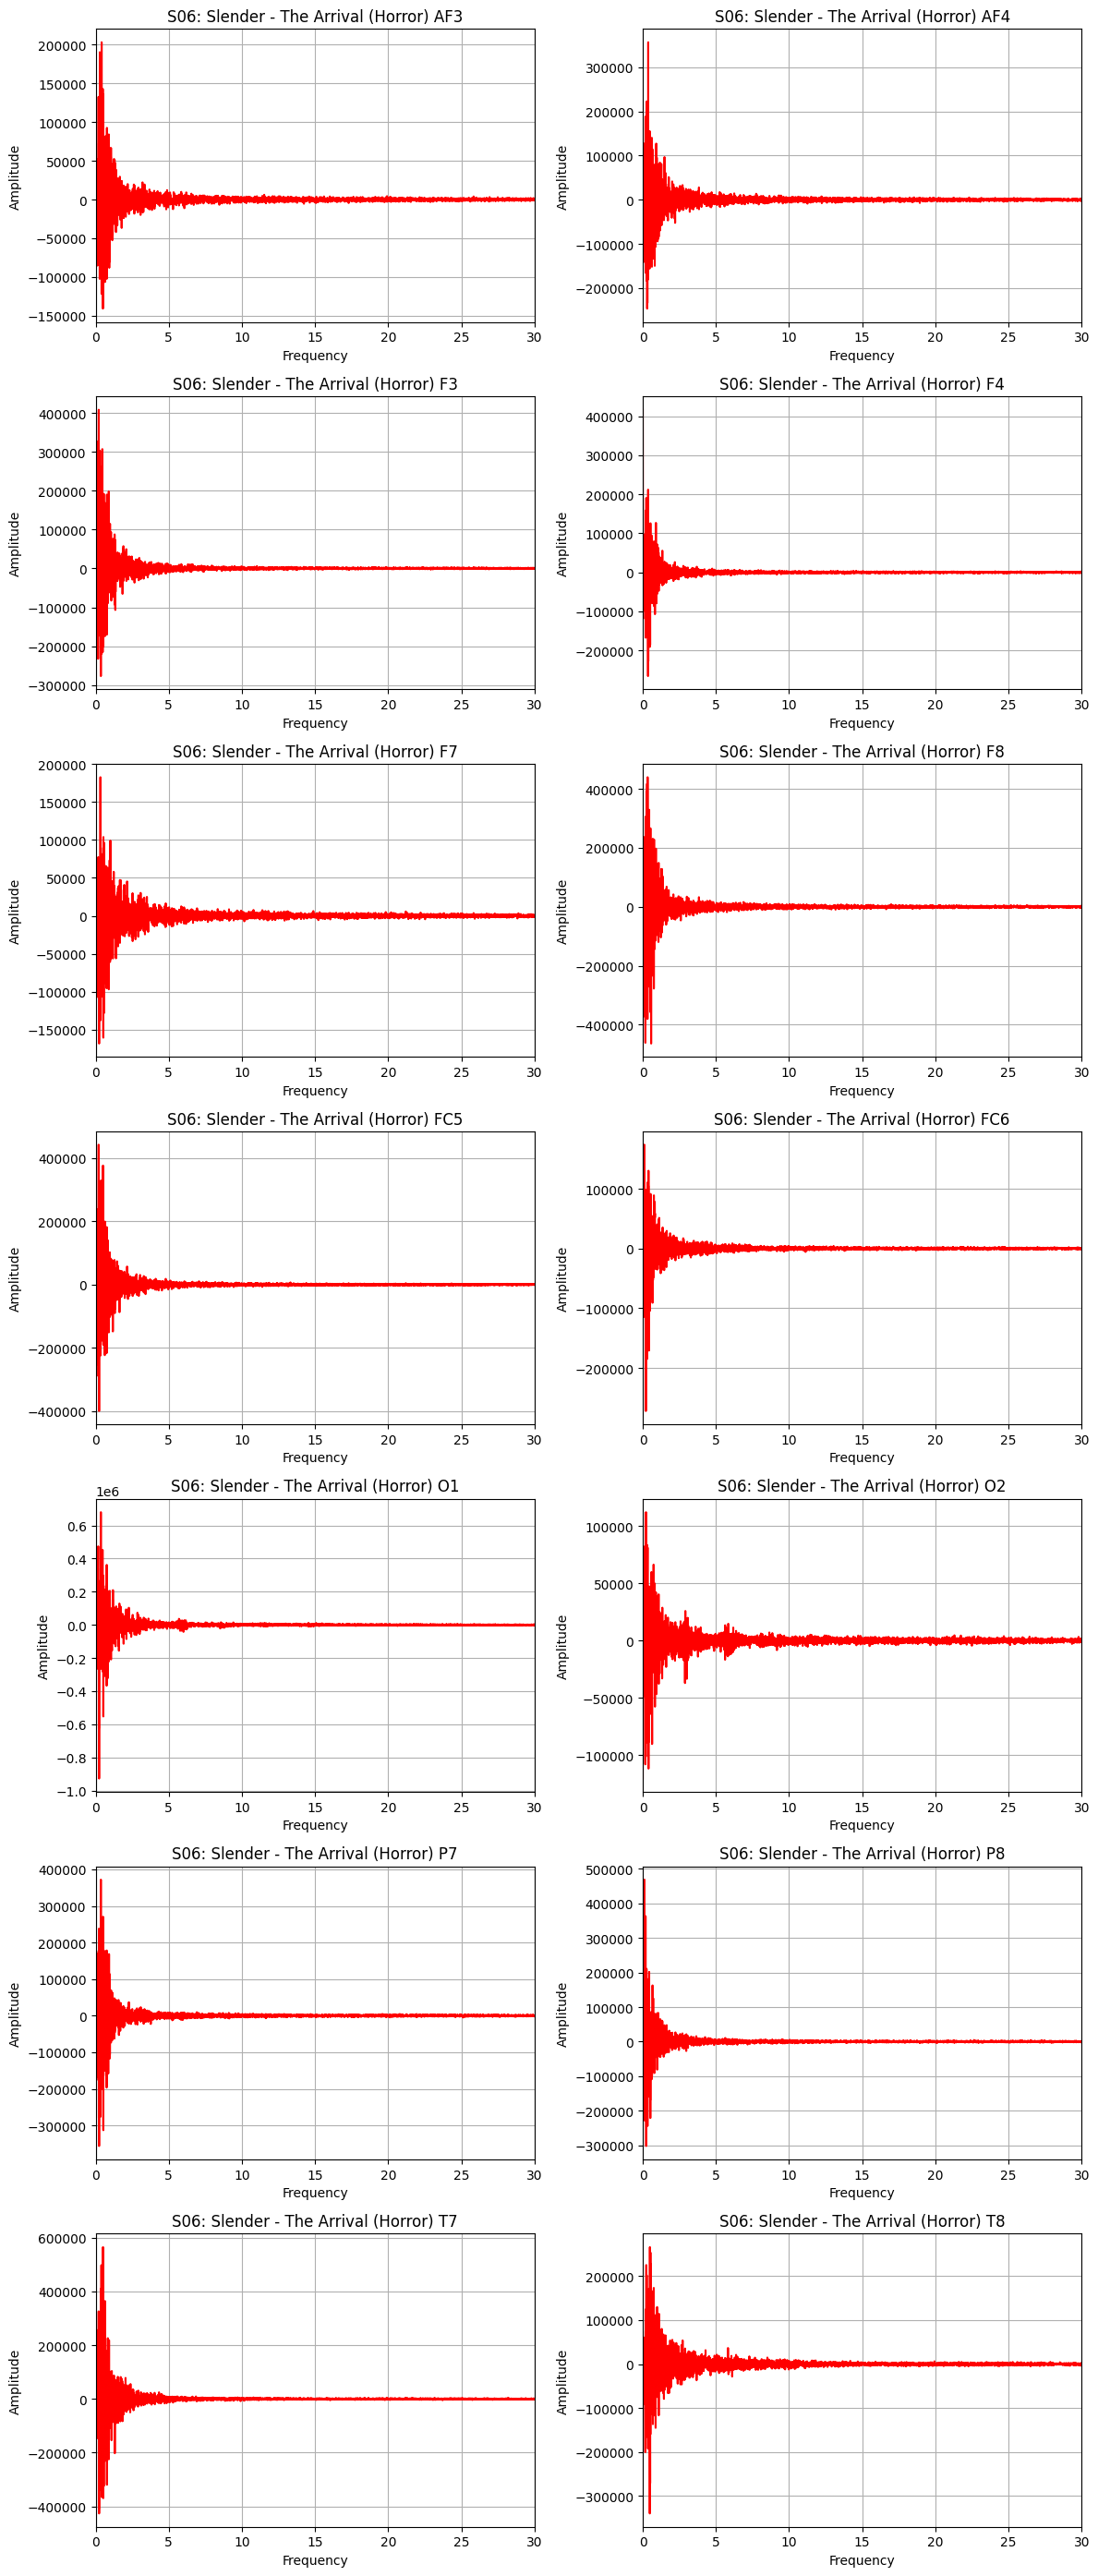

/home/paul-dutton/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/paul-dutton/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


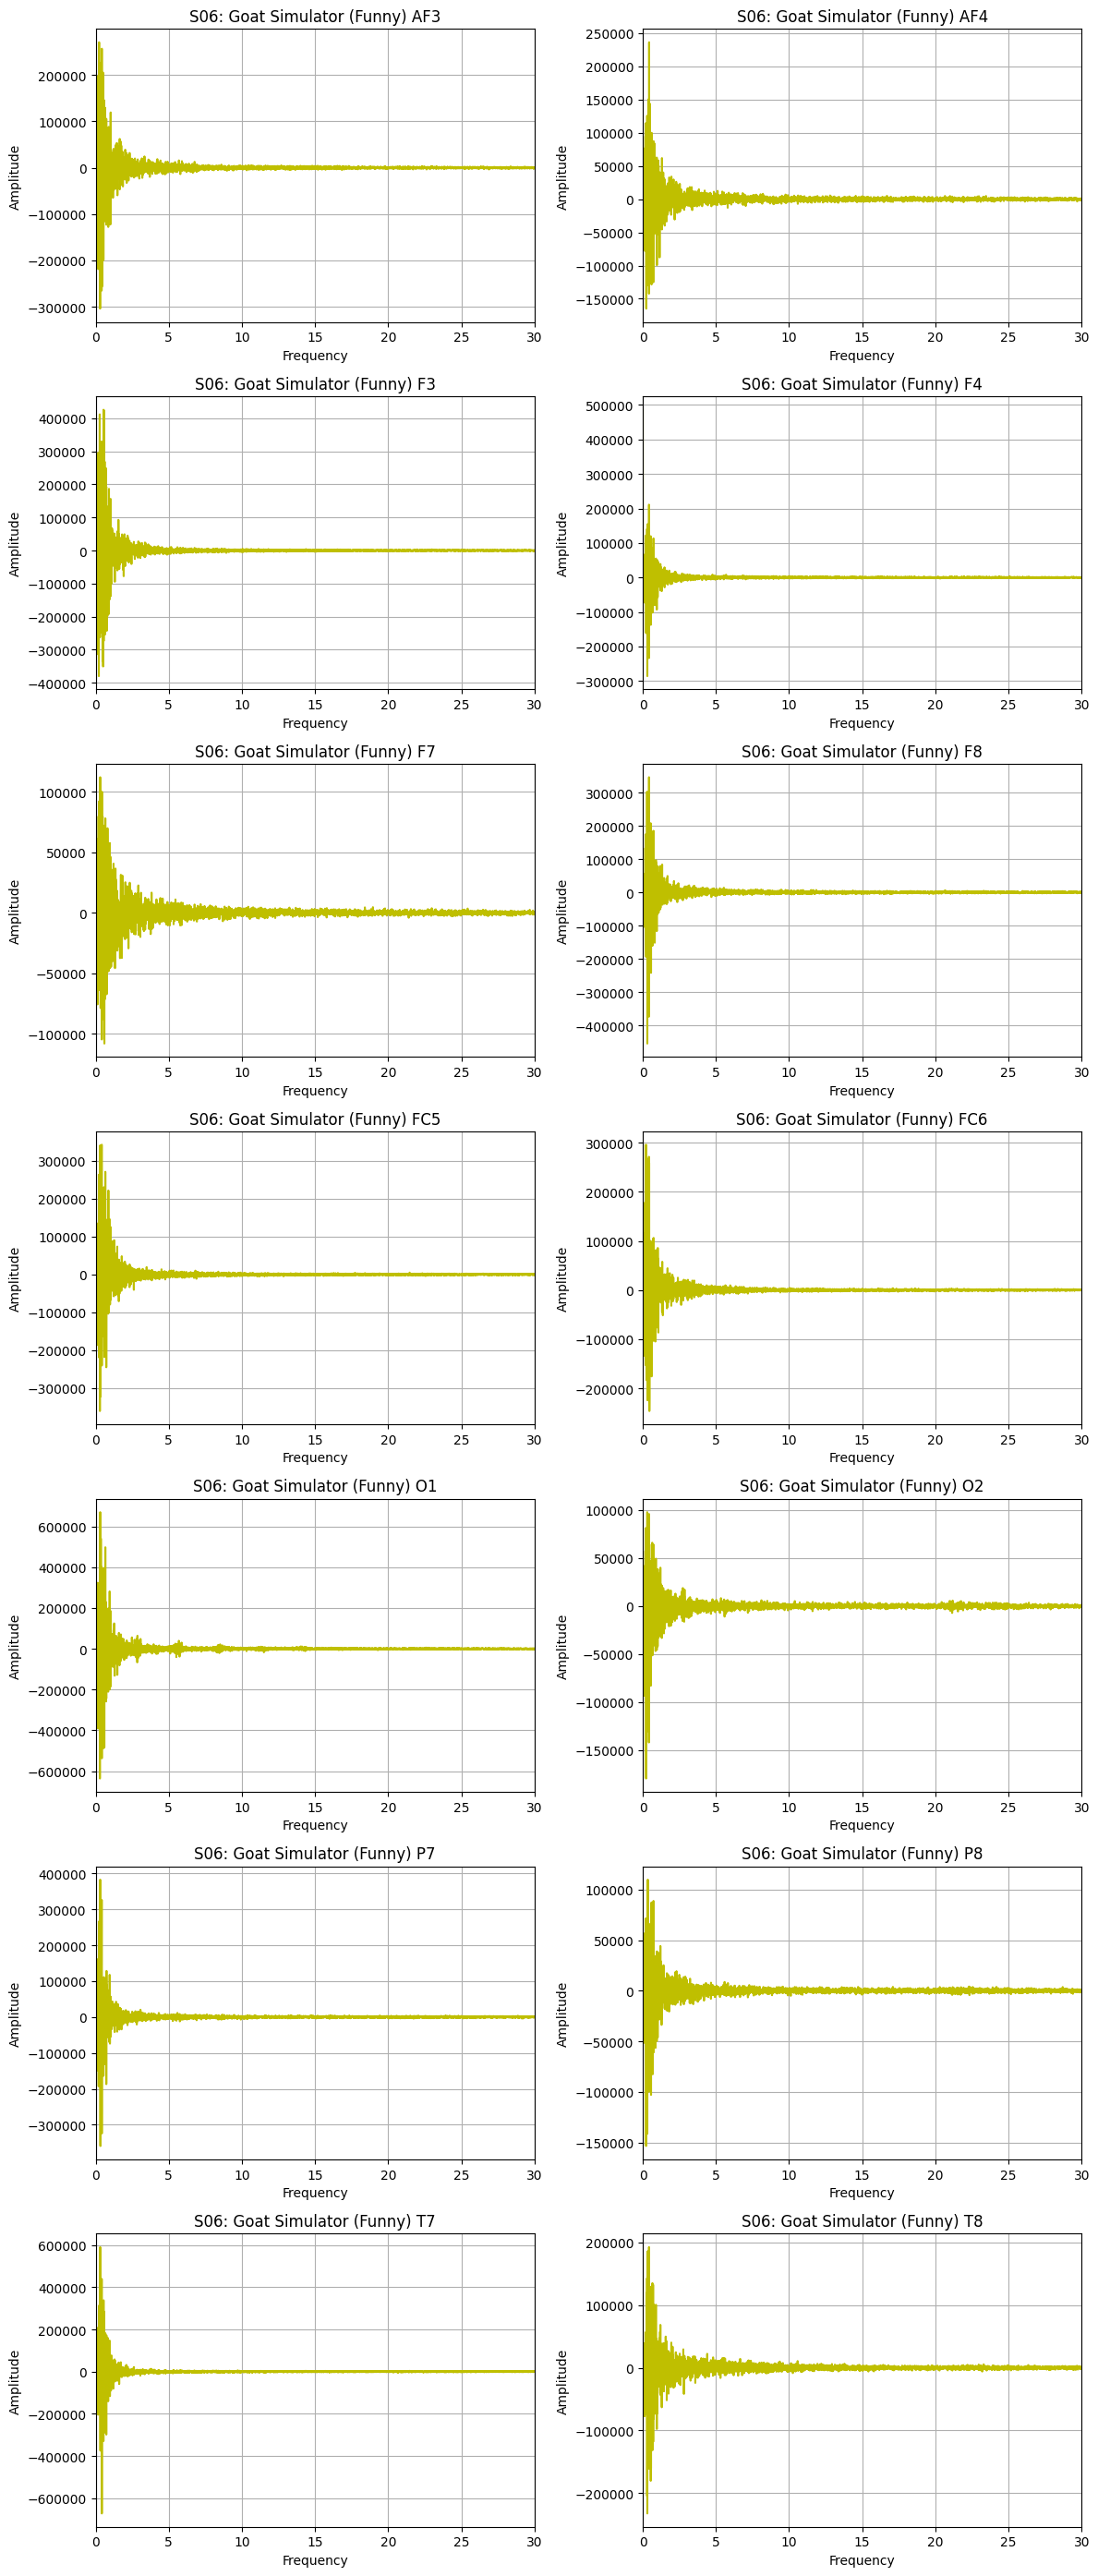

/home/paul-dutton/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/paul-dutton/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


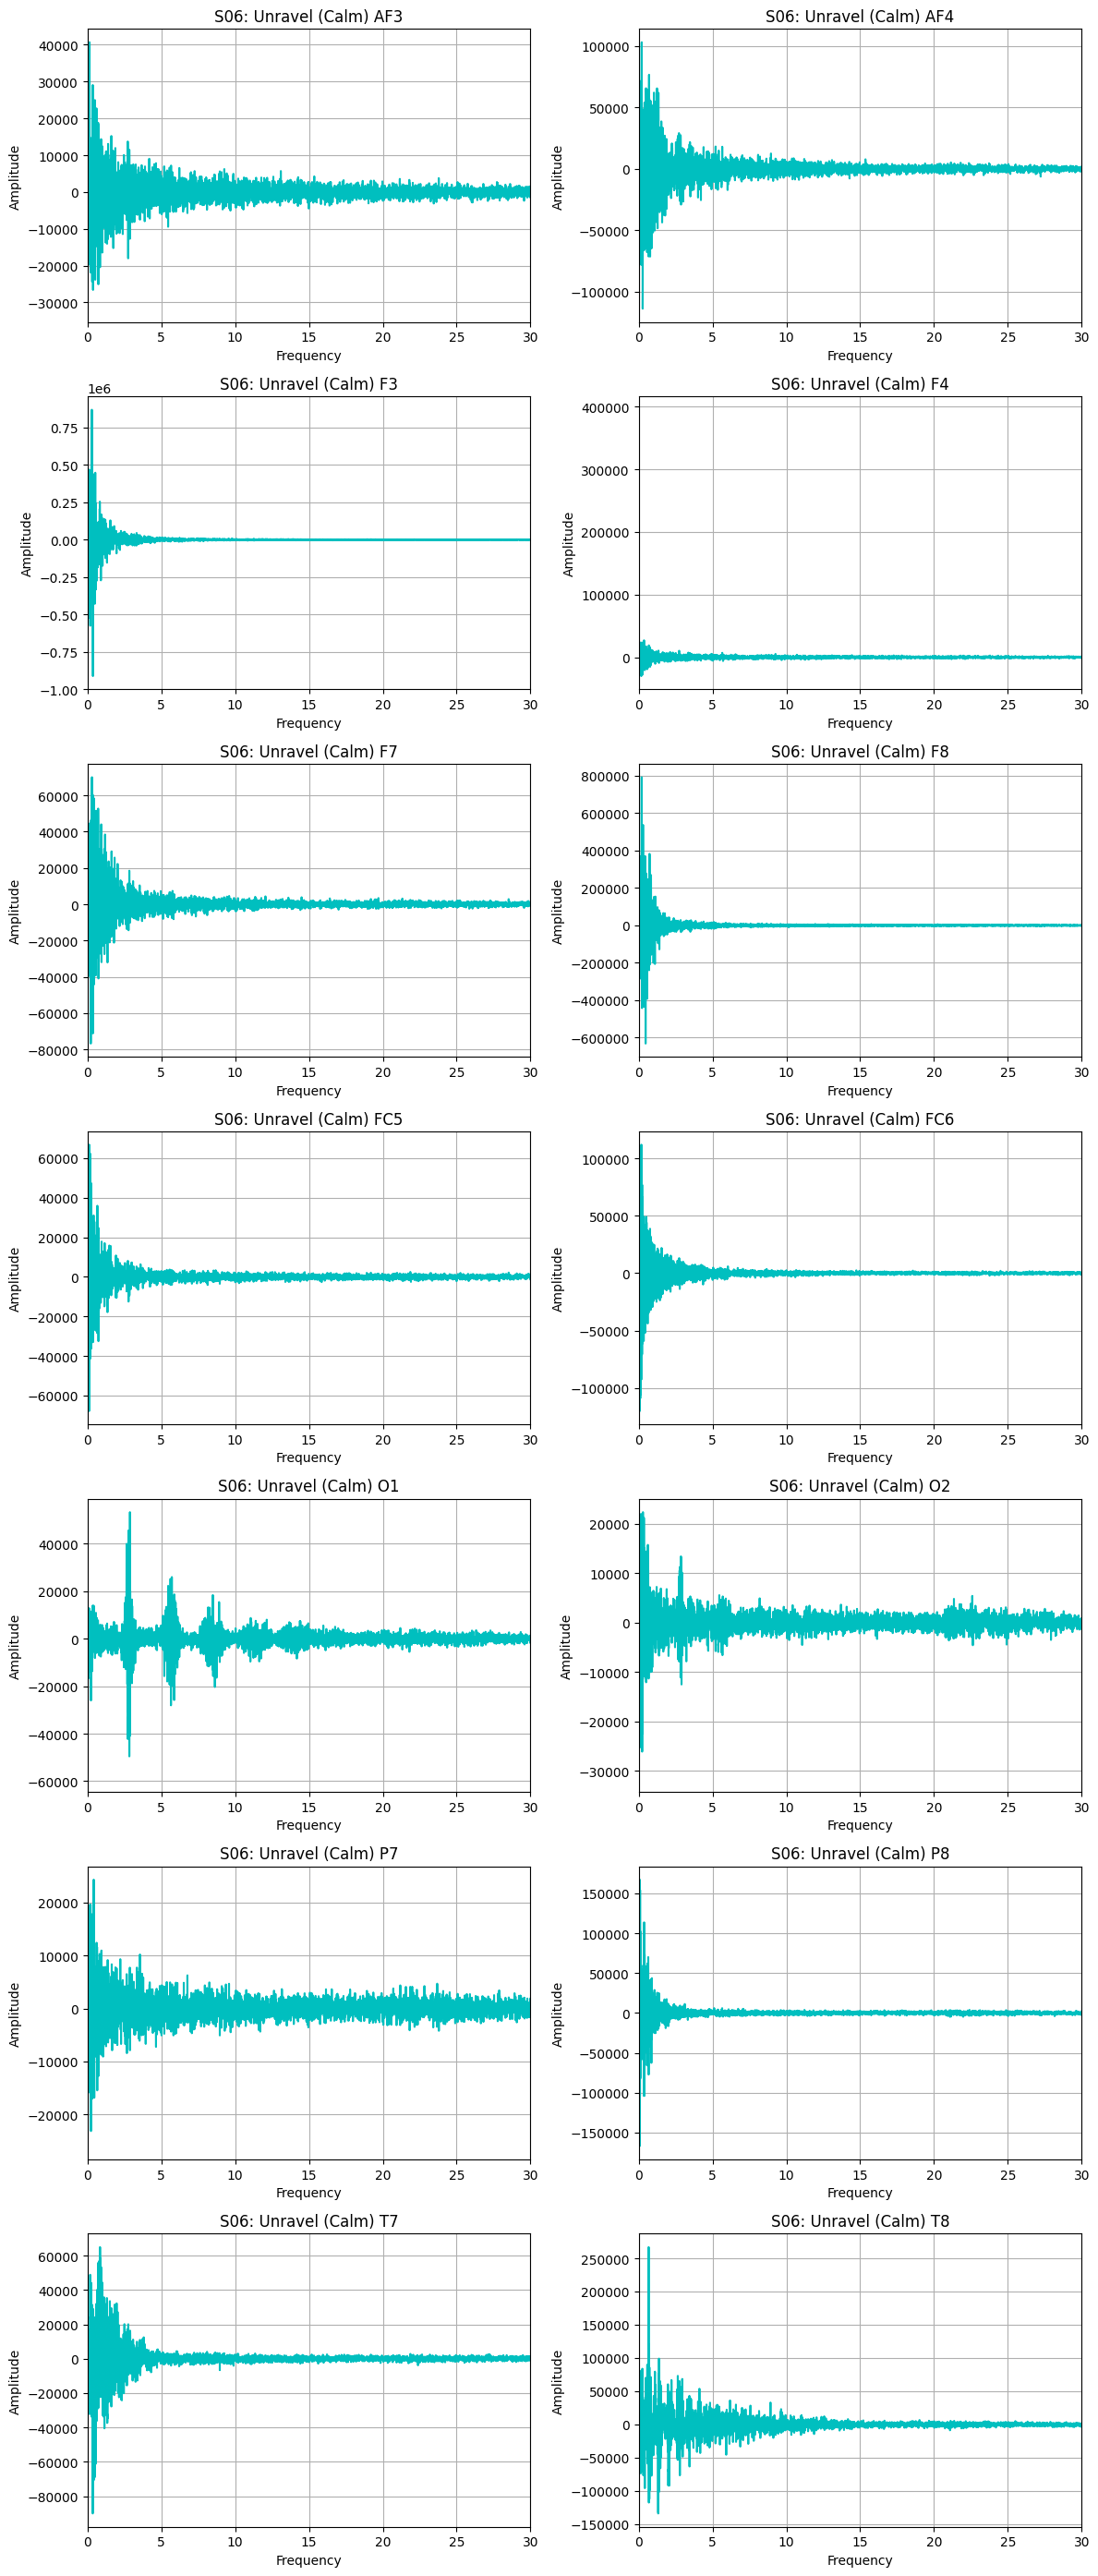

In [34]:
for csv_filename in os.listdir(path_to_subject): # get some csv file from the dir
  path_to_file = os.path.join(path_to_subject, csv_filename)
  df = pd.read_csv(path_to_file)
  plotFFTs(df, csv_filename)
  #print(path_to_file, df.head(2))